<h1 style="color: #00BFFF;">00 |</h1>

In [ ]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# 🤖 Machine Learning
from sklearn.linear_model import LinearRegression # linear regression model
from scipy.stats import skew # data distribution assymmetry

In [ ]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [ ]:
# 🔧 Basic functions
def snake_columns(data): # snake_case columns
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.shape}.")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

# 🎯 Specific functions
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

<h2 style="color: #008080;">Data Copy</h2>

<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">
    
**First impression:**
    
_____________

💻 The following is a collection of **X-year data** (from X to Y) of X, among X different columns:    
 
    
* --> **Target variable**:
* --> **Features**:

_____________
</blockquote>

<h1 style="color: #00BFFF;">02 | Data cleaning</h1>

<h2 style="color: #008080;">Dealing with Duplicates</h2>

In [ ]:
explore_data(data_copy) # sum & returns duplicates, NaN & empty spaces

<h2 style="color: #008080;">Dealing with datetime formats</h2>

In [ ]:
# Convert 'date' column to datetime format (it's an object after creating a new dataset)
data_copy['date'] = pd.to_datetime(data_copy['date'])

# Dates are complex. We will create 3 new columns for year, month and day.
data_copy['year'] = data_copy['date'].dt.year
data_copy['month'] = data_copy['date'].dt.month_name().str.slice(stop=3) # instead of giving them a number, we make them categoricals, and then we will encode them

<h2 style="color: #008080;">Encoding Categoricals</h2>

In [ ]:
dummies = pd.get_dummies(data_copy['month'], prefix='month')
data_copy = pd.concat([data_copy, dummies], axis=1)

<h2 style="color: #008080;">Dropping more unnecessary features</h2>

In [ ]:
data_copy = data_copy.drop('id', axis=1) # Well, obvious or NaN? I mean, it's NaN or never.
data_copy = data_copy.drop(['lat', 'long', 'zipcode', 'date', 'month'], axis=1)
# lat, long and zipcode we have them storage in seattle dataset.
# date has fulfilled it's purpose

<h2 style="color: #008080;">Target coordinates</h2>

We will just kindly move our target to the right.

In [ ]:
data_copy.columns

In [ ]:
# Kindly moving our target to the right, as best practices

In [ ]:
# Let's see how it looks like !
data_copy.sample(5)

<h1 style="color: #00BFFF;">03 | EDA</h1>

<h2 style="color: #008080;">Checking Duplicates and entry errors</h2>

In [ ]:
explore_data(cleaned)

<h2 style="color: #008080;">Checking Data distributions</h2>

In [ ]:
# Dark background
sns.set(style="darkgrid")

# Number of rows and columns for the grid
n_features = len(house_features.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(house_features.columns):
    sns.histplot(data=house_features, x=column, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

# Removing empty subplots
for i in range(len(house_features.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

fig.suptitle("Distributions of House Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">
</blockquote>

<h2 style="color: #008080;">Dealing with Skewness</h2>

In [ ]:
# Calculate skewness only for numeric columns
skew_values = house_features.apply(skew)
print(skew_values)

<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">
</blockquote>

<h2 style="color: #008080;">Checking Outliers</h2>

In [ ]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

<h2 style="color: #008080;">Dealing with Multicollinearity</h2>

In [ ]:
# Creating the matrix
X_corr = round(X_N.corr(), 4)

In [ ]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(15, 20))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(X_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

In [ ]:
# Split the data into input and target variables
X = df.drop("price", axis=1)
y = df["price"]

<h2 style="color: #008080;">Normalizing the Data</h2>

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<h1 style="color: #00BFFF;">05 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [ ]:
len(X_scaled)*0.7 # Len before the test

In [ ]:
len(X_test) # Len after the test

<h2 style="color: #008080;">Model Validation</h2>

In [ ]:
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

In [ ]:
# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">

</blockquote>

<h1 style="color: #00BFFF;">05 | Improving the Model</h1>

<h2 style="color: #008080;">Dealing with Outliers</h2>

In [6]:
# We will check all features, except for month encoded
house_features = cleaned[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

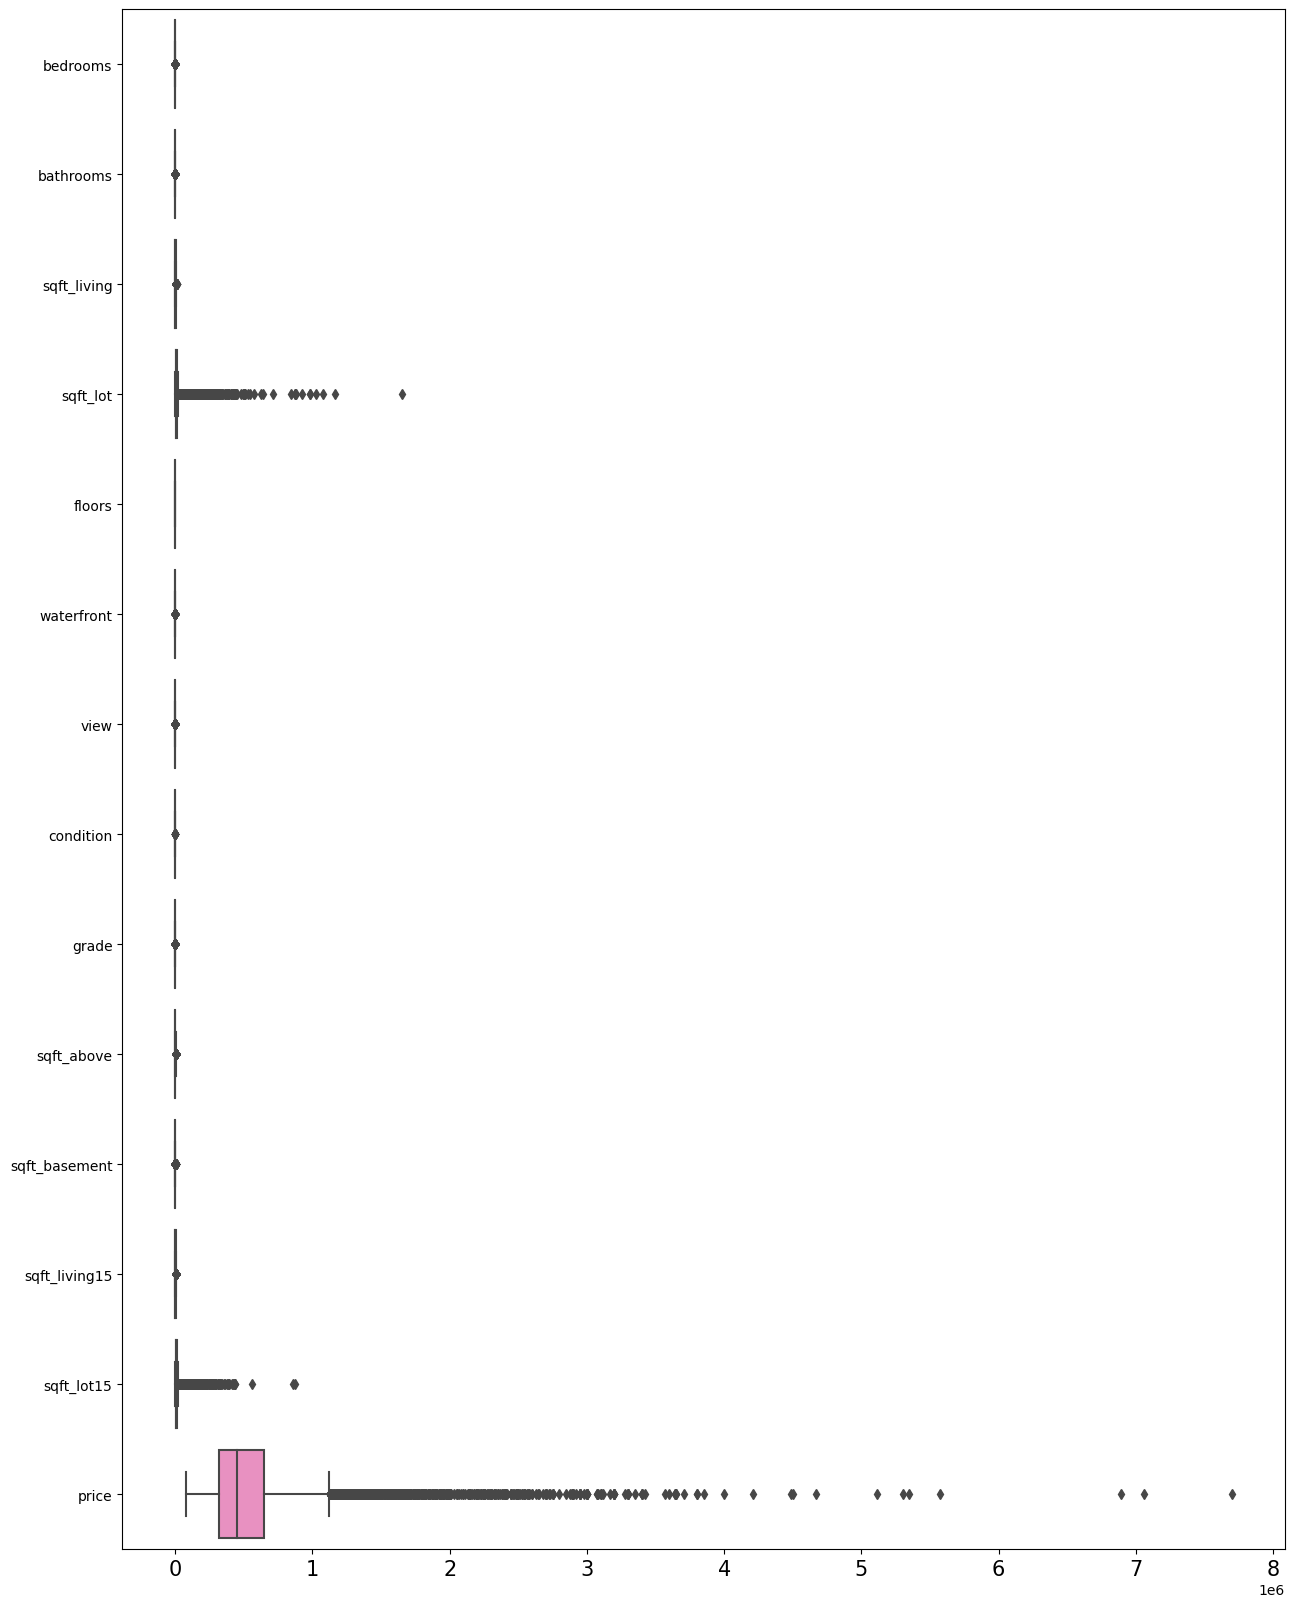

In [7]:
# For house_features variable used while checking Data distributions
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [8]:
house_features = outlier_slayer(house_features)

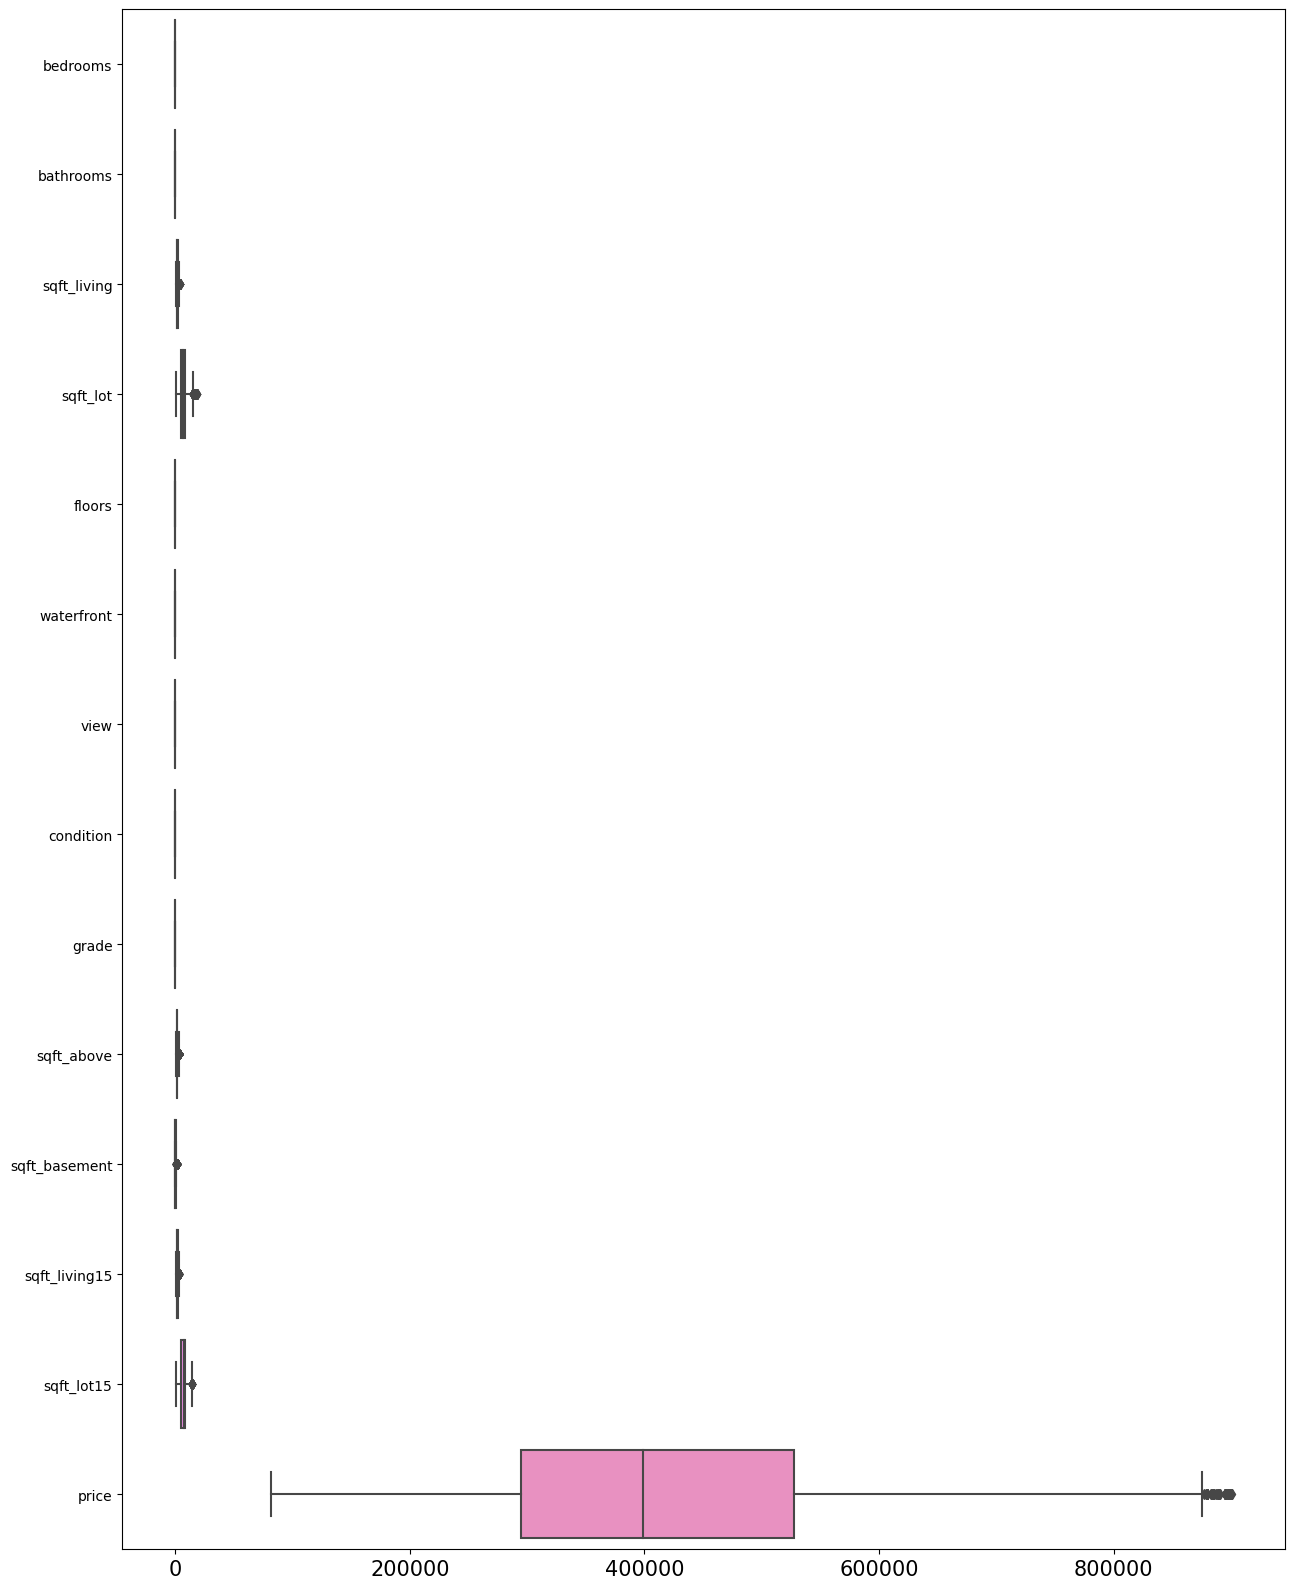

In [9]:
fig, ax = plt.subplots(figsize=(15, 20))
sns.boxplot(data=house_features, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [10]:
# Now we are able to predict higher property value - $650K.

<h2 style="color: #008080;">Updating the df</h2>

In [11]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [12]:
df2 = cleaned

In [13]:
# Split the data into input and target variables
X = df2.drop("price", axis=1)
y = df2["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6323
RMSE =  218923.5864
The value of the metric MSE is  47927536689.4592
MAE =  141766.2985


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* Removing outliers was an important step, but it did not significally improved our model. 
* Instead, it's slightly worst if we compare it from before:
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
    </tr>
  </tbody>
</table>

<h2 style="color: #008080;">Dealing with Data distributions I: log transform</h2>

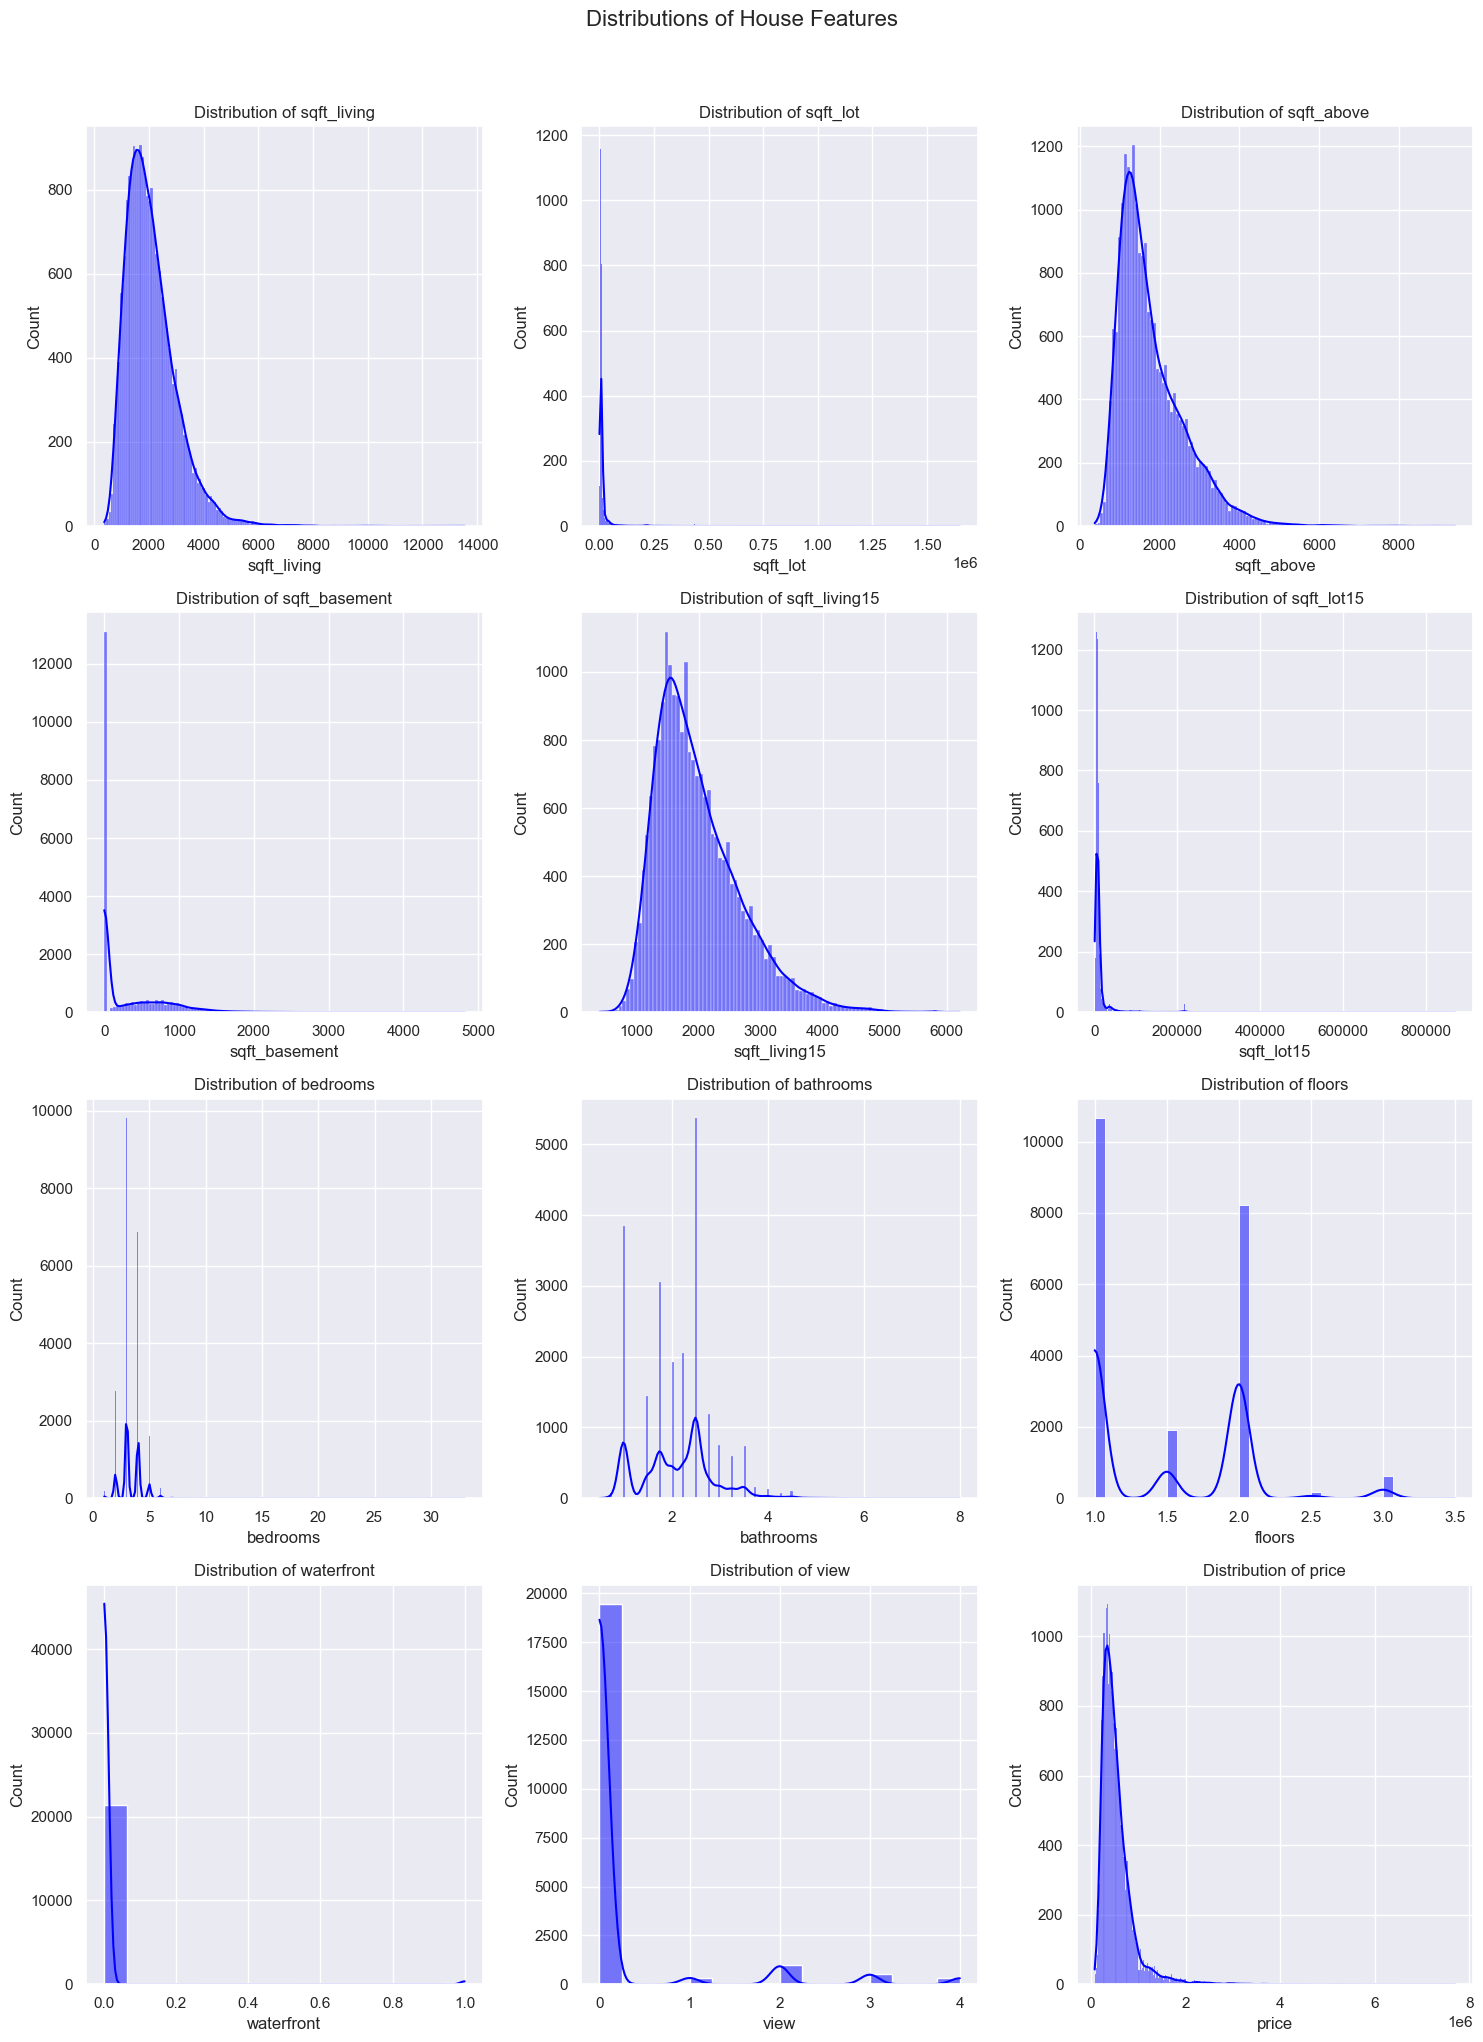

In [14]:
# Dark background
sns.set(style="darkgrid")

# Number of rows and columns for the grid
n_features = len(house_pearson.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(house_pearson.columns):
    sns.histplot(data=house_pearson, x=column, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

# Removing empty subplots
for i in range(len(house_pearson.columns), n_rows * n_cols):
    fig.delaxes(axes[i])

fig.suptitle("Distributions of House Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# After removing outliers, data looks more normal distributed if we compared it to the 03_eda script
# We will first apply log transformations to `sqft_living`, `sqft_above`, `sqft_living15`, `sqft_lot15` and `price`

In [16]:
log_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']
for column in log_features:
    house_features[column] = np.log(house_features[column])

<h2 style="color: #008080;">Updating the df</h2>

In [17]:
cleaned.update(house_features)

<h2 style="color: #008080;">Improving it's an iteration process...</h2>

In [18]:
df3 = cleaned

In [19]:
# Split the data into input and target variables
X = df3.drop("price", axis=1)
y = df3["price"]

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

# Model fit
model = LinearRegression() # We pick our model
model.fit(X_train,y_train) # We fit the training data into the model

# Train data for the model
model.fit(X_train,y_train) # We fit the training data into the model

# Predictions
predictions = model.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.8237
RMSE =  194499.5709
The value of the metric MSE is  37830083069.5626
MAE =  100364.5702


<blockquote style="background-color: #ffeeba; color: #856404; border-color: #ffeeba; padding: 10px; border-radius: 5px;">
    
* So, after applying log transform to some bell-shape distributions highly improved our model.
* `Patern-Pending 03` model seems to be better... can we improve it even further?
    
</blockquote>
    
<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>First Model</th>
      <th>Patent-Pending 02</th>
      <th>Patent-Pending 03</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>R2</td>
      <td>0.6326</td>
      <td>0.6323</td>
      <td>0.8237</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>218841.0967</td>
      <td>218923.5864</td>
      <td>194499.5709</td>
    </tr>
    <tr>
      <td>MSE</td>
      <td>47891425625.3193</td>
      <td>47927536689.4592</td>
      <td>37830083069.5626</td>
    </tr>
    <tr>
      <td>MAE</td>
      <td>141684.4693</td>
      <td>141766.2985</td>
      <td>100364.5702</td>
    </tr>
  </tbody>
</table>

<h2 style="color: #008080;">Checking Multicollinearity</h2>

In [20]:
# Creating the Pearson matrix
house_matrix = round(house_pearson.corr(), 4)

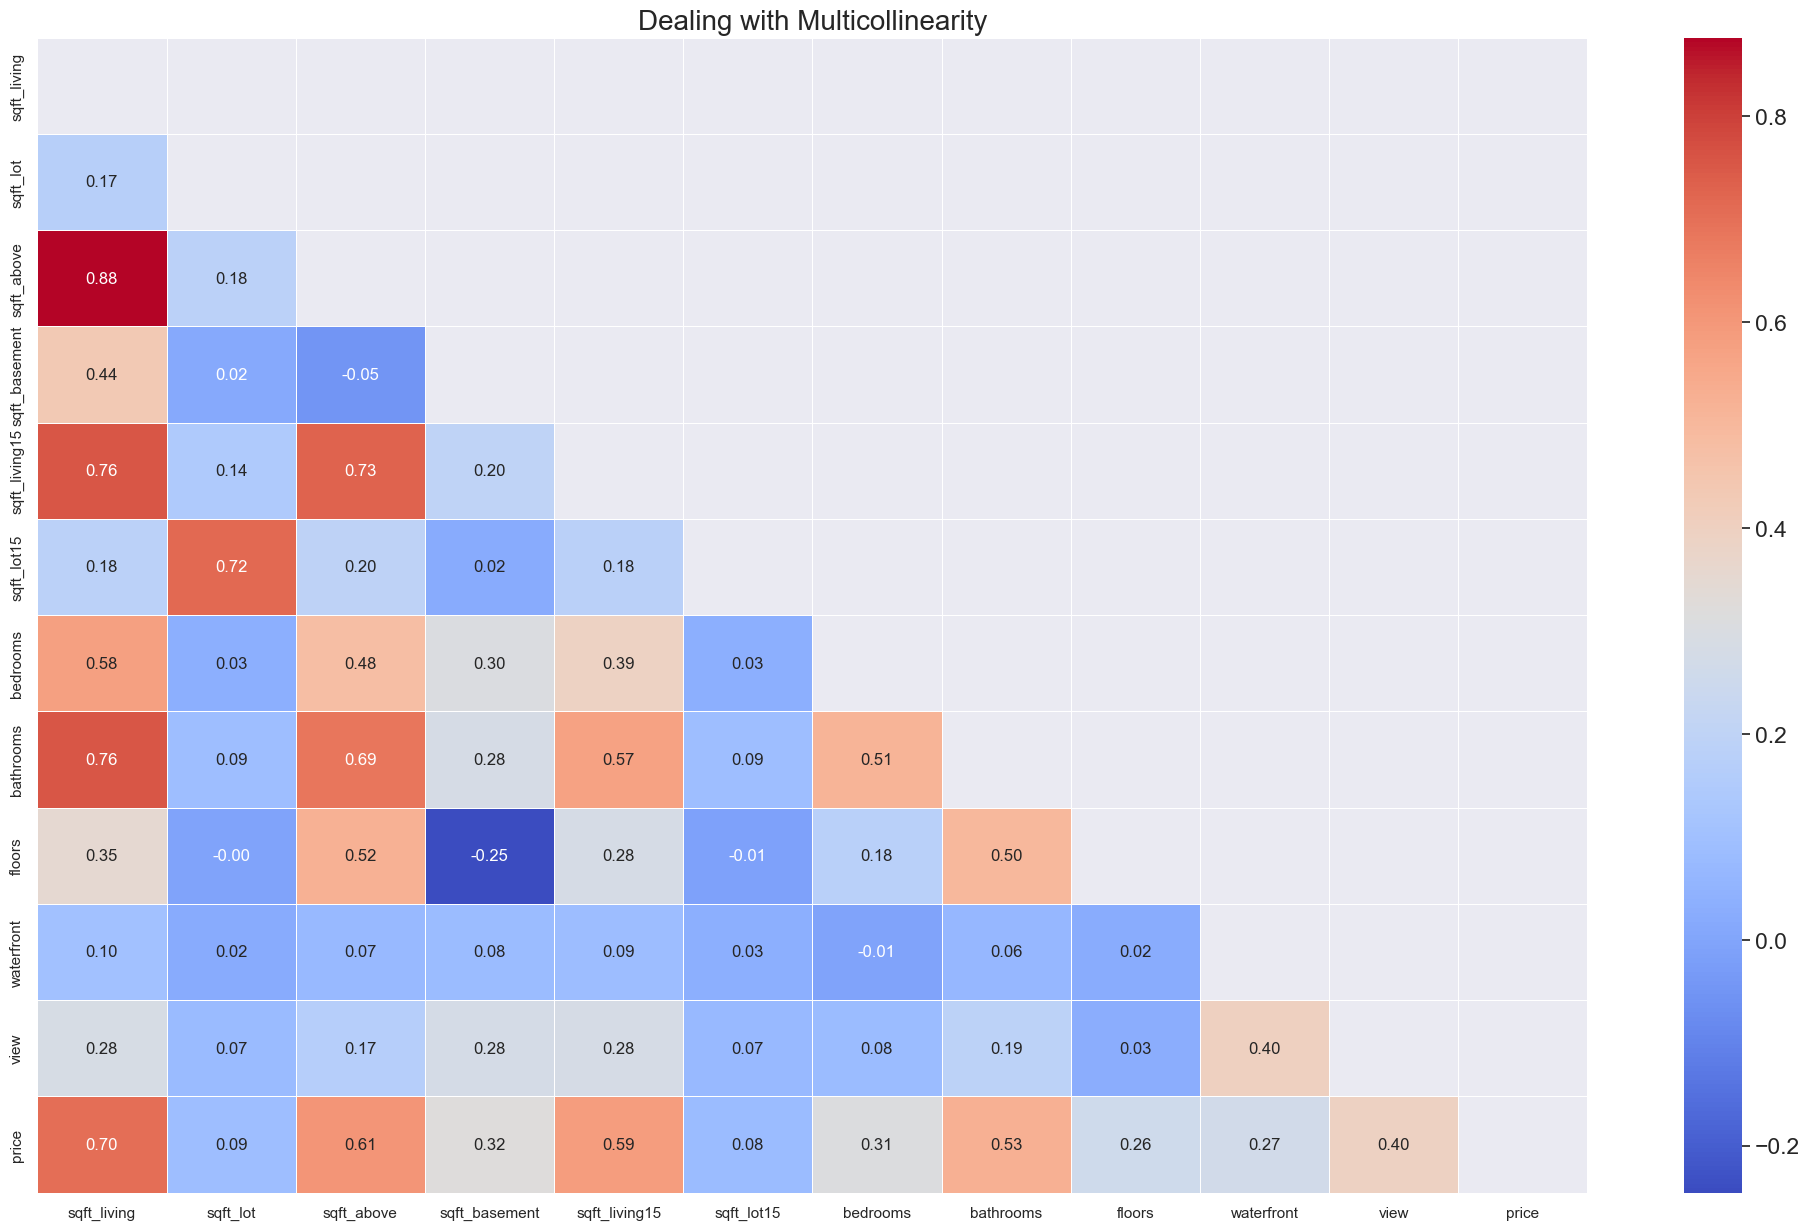

In [21]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(house_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(house_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [22]:
# Nothing to do here

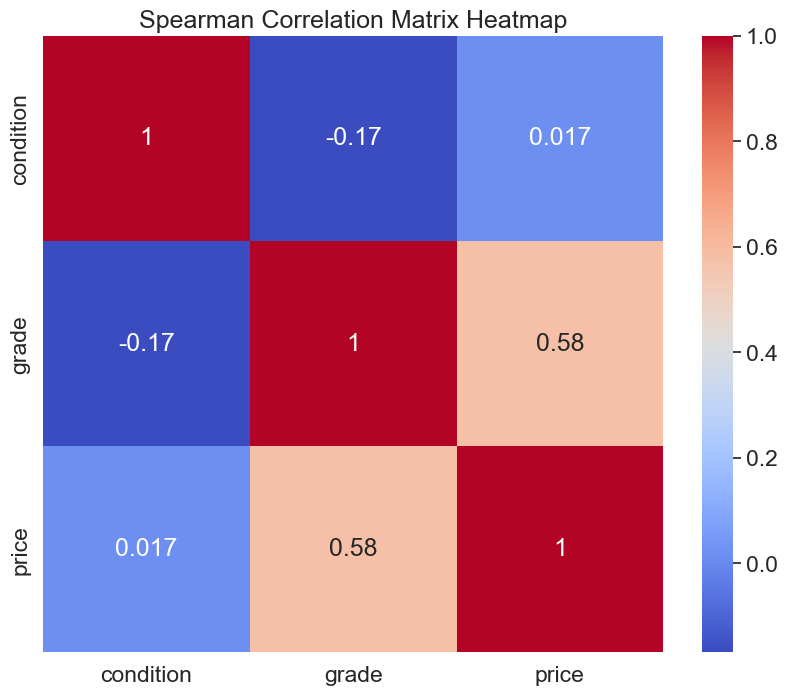

In [57]:
# Creating the Pearson matrix
correlation_matrix, _ = spearmanr(house_spearman)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=house_spearman.columns, yticklabels=house_spearman.columns)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

In [23]:
# The darker the color, the stronger the correlation.
# Nothing to do here,

<h2 style="color: #008080;">Testing Regressors</h2>

<h1 style="color: #00BFFF;">06 | Reporting</h1>

<h2 style="color: #008080;">Presenting the results</h2>

In [ ]:
# Dataframe for true, predicted and absolute difference values
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)

# Scale the true and predicted values to be between 0 and 1
results['true_scaled'] = (results['true'] - results['true'].min()) / (results['true'].max() - results['true'].min())
results['pred_scaled'] = (results['pred'] - results['pred'].min()) / (results['pred'].max() - results['pred'].min())

In [ ]:
sns.set_style('whitegrid')
sns.regplot(x='true_scaled', y='pred_scaled', data=results, color='black', scatter_kws={'s': 100, 'color': '#1f77b4', 'alpha': 0.5, 'edgecolor': 'w'})
plt.xlabel('True Values', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Predictions', fontsize=14, fontweight='bold', color='#34495e')
plt.title('True Values Vs Predicted Values', fontsize=16, fontweight='bold', color='#34495e')
plt.xticks(fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.tight_layout()
plt.show()